## Making datasets(csv) for implementation on external gpu

In [1]:
import os, shutil
import pandas as pd
import numpy as np
import cv2 as cv

In [2]:
dataset_dir = 'dogs-vs-cats/train'

# The directory where we will
# store our smaller dataset
base_dir = '.'
images=[]

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    dst = os.path.join(dataset_dir, fname)
    img = cv.imread(dst)
    img = cv.resize(img, (150,150))
    images.append(img)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    dst = os.path.join(dataset_dir, fname)
    img = cv.imread(dst)
    img = cv.resize(img, (150,150))
    images.append(img)
    
train_data = pd.DataFrame({'images':images, 'label':np.concatenate((np.zeros(1000), np.ones(1000)),axis=0)})
train_data

,images,label
0,"[[[87, 164, 203], [92, 169, 208], [93, 170, 20...",0.0
1,"[[[40, 44, 39], [43, 44, 40], [48, 45, 41], [5...",0.0
2,"[[[49, 47, 61], [50, 48, 61], [44, 40, 51], [4...",0.0
3,"[[[117, 127, 136], [117, 126, 136], [102, 109,...",0.0
4,"[[[121, 130, 140], [133, 142, 152], [140, 149,...",0.0
...,...,...
1995,"[[[96, 91, 16], [98, 92, 19], [100, 94, 22], [...",1.0
1996,"[[[29, 28, 24], [25, 24, 20], [24, 23, 19], [2...",1.0
1997,"[[[121, 135, 153], [148, 162, 180], [151, 165,...",1.0
1998,"[[[40, 91, 63], [41, 92, 64], [43, 94, 66], [4...",1.0


In [3]:
train_data = train_data.reindex(np.random.permutation(train_data.index))

In [4]:
train_data = train_data.reset_index(drop=True)

In [5]:
train_data.head(10)

,images,label
0,"[[[11, 37, 77], [9, 39, 83], [13, 50, 93], [60...",0.0
1,"[[[38, 44, 39], [41, 45, 40], [32, 33, 29], [2...",0.0
2,"[[[169, 171, 165], [180, 179, 181], [176, 177,...",1.0
3,"[[[248, 246, 246], [242, 242, 242], [241, 243,...",1.0
4,"[[[19, 15, 10], [17, 13, 8], [14, 11, 7], [13,...",0.0
5,"[[[133, 146, 144], [133, 146, 144], [133, 146,...",0.0
6,"[[[85, 88, 97], [88, 91, 99], [82, 85, 94], [8...",1.0
7,"[[[77, 66, 68], [76, 65, 67], [78, 67, 69], [8...",0.0
8,"[[[109, 87, 89], [224, 206, 207], [255, 251, 2...",1.0
9,"[[[21, 47, 29], [21, 47, 29], [24, 50, 32], [2...",1.0


In [6]:
train_data['images'][0]

array([[[ 11,  37,  77],
        [  9,  39,  83],
        [ 13,  50,  93],
        ...,
        [ 16,   7,  74],
        [ 18,  10,  75],
        [ 19,  11,  76]],

       [[ 10,  36,  76],
        [ 10,  41,  85],
        [ 11,  48,  91],
        ...,
        [ 19,  10,  77],
        [ 19,  11,  76],
        [ 18,  10,  74]],

       [[ 14,  40,  80],
        [ 16,  47,  91],
        [ 14,  50,  93],
        ...,
        [ 20,  11,  78],
        [ 19,  11,  76],
        [ 18,  10,  75]],

       ...,

       [[ 46,  75, 109],
        [ 52,  72, 114],
        [ 57,  71, 119],
        ...,
        [ 23,  15, 108],
        [ 19,  11, 104],
        [ 19,  11, 104]],

       [[ 48,  76, 111],
        [ 53,  73, 116],
        [ 58,  72, 120],
        ...,
        [ 24,  13, 106],
        [ 24,  13, 106],
        [ 22,  11, 104]],

       [[ 48,  76, 111],
        [ 53,  73, 116],
        [ 58,  72, 120],
        ...,
        [ 22,  11, 104],
        [ 25,  14, 107],
        [ 22,  11, 104]]

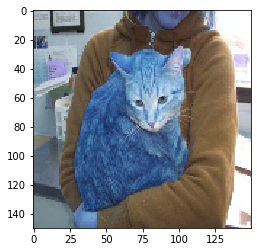

In [9]:
import matplotlib.pyplot as plt

plt.imshow(train_data['images'][55])
plt.show()

In [14]:
import pickle

In [22]:
pickle.dump(train_data, open("train_data.pkl", 'wb'), protocol=4)

In [23]:
df = pickle.load(open('train_data.pkl','rb'))

array([[[ 11,  37,  77],
        [  9,  39,  83],
        [ 13,  50,  93],
        ...,
        [ 16,   7,  74],
        [ 18,  10,  75],
        [ 19,  11,  76]],

       [[ 10,  36,  76],
        [ 10,  41,  85],
        [ 11,  48,  91],
        ...,
        [ 19,  10,  77],
        [ 19,  11,  76],
        [ 18,  10,  74]],

       [[ 14,  40,  80],
        [ 16,  47,  91],
        [ 14,  50,  93],
        ...,
        [ 20,  11,  78],
        [ 19,  11,  76],
        [ 18,  10,  75]],

       ...,

       [[ 46,  75, 109],
        [ 52,  72, 114],
        [ 57,  71, 119],
        ...,
        [ 23,  15, 108],
        [ 19,  11, 104],
        [ 19,  11, 104]],

       [[ 48,  76, 111],
        [ 53,  73, 116],
        [ 58,  72, 120],
        ...,
        [ 24,  13, 106],
        [ 24,  13, 106],
        [ 22,  11, 104]],

       [[ 48,  76, 111],
        [ 53,  73, 116],
        [ 58,  72, 120],
        ...,
        [ 22,  11, 104],
        [ 25,  14, 107],
        [ 22,  11, 104]]

In [35]:
images= []
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    dst = os.path.join(dataset_dir, fname)
    img = cv.imread(dst)
    img = cv.resize(img, (150,150))
    images.append(img)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    dst = os.path.join(dataset_dir, fname)
    img = cv.imread(dst)
    img = cv.resize(img, (150,150))
    images.append(img)
    
validation_data = pd.DataFrame({'images':images, 'label':np.concatenate((np.zeros(500), np.ones(500)),axis=0)})
validation_data

,images,label
0,"[[[75, 112, 140], [75, 112, 140], [79, 116, 14...",0.0
1,"[[[8, 52, 55], [17, 50, 59], [20, 48, 60], [15...",0.0
2,"[[[103, 122, 157], [105, 124, 159], [103, 122,...",0.0
3,"[[[176, 169, 171], [165, 158, 161], [164, 156,...",0.0
4,"[[[3, 6, 11], [3, 6, 11], [4, 7, 12], [4, 7, 1...",0.0
...,...,...
995,"[[[185, 198, 194], [203, 210, 207], [212, 215,...",1.0
996,"[[[248, 245, 247], [249, 246, 248], [250, 247,...",1.0
997,"[[[47, 59, 65], [47, 59, 65], [47, 59, 65], [4...",1.0
998,"[[[99, 89, 89], [98, 85, 85], [102, 88, 89], [...",1.0


In [36]:
validation_data = validation_data.reindex(np.random.permutation(validation_data.index))
validation_data = validation_data.reset_index(drop=True)

In [37]:
pickle.dump(validation_data, open('validation_data.pkl', 'wb'), protocol=4)

In [34]:
images= []
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    dst = os.path.join(dataset_dir, fname)
    img = cv.imread(dst)
    img = cv.resize(img, (150,150))
    images.append(img)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    dst = os.path.join(dataset_dir, fname)
    img = cv.imread(dst)
    img = cv.resize(img, (150,150))
    images.append(img)
    
test_data = pd.DataFrame({'images':images, 'label':np.concatenate((np.zeros(500), np.ones(500)),axis=0)})
test_data = test_data.reindex(np.random.permutation(test_data.index))
test_data = test_data.reset_index(drop=True)

pickle.dump(test_data, open('test_data.pkl', 'wb'), protocol=4)

In [33]:
test_data

,images,label
0,"[[[63, 68, 67], [66, 71, 70], [63, 69, 68], [6...",0.0
1,"[[[226, 218, 211], [226, 218, 211], [227, 219,...",0.0
2,NaN,NaN
3,"[[[98, 201, 153], [99, 203, 150], [92, 197, 14...",1.0
4,"[[[97, 182, 155], [101, 170, 138], [111, 169, ...",1.0
...,...,...
1995,NaN,NaN
1996,"[[[252, 253, 254], [245, 247, 249], [245, 249,...",1.0
1997,"[[[41, 40, 82], [43, 42, 83], [40, 39, 81], [4...",1.0
1998,"[[[115, 128, 137], [138, 151, 152], [132, 140,...",0.0
